##                               Speech Emotion Recognition

In [1]:
import numpy as np 
import pandas as pd 
import os

## RAVDESS Dataset
* #### The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) contains 7,356 files
* #### The database contains 24 professional actors (12 female, 12 male), saying a statement  in 8 emotions which includes (neutral, calm, happy, sad, angry, fearful, surprise, and disgust), 2 times for each emotion (one normal, other strong)


### RAVDESS file_name 

* ##### Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* ##### Vocal channel (01 = speech, 02 = song).
* ##### Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* ##### Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* ##### Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* ##### Repetition (01 = 1st repetition, 02 = 2nd repetition).
* ##### Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [2]:
## path to RAVDESS data
rav_path = '/kaggle/input/ravdess-emotional-speech-audio'

In [3]:
#label map for RAVDESS dataset which maps numerical value to emotion
label_map_ravdess = {
    '01' : 'neutral', '03' : 'happy', '04' : 'sad', '05' : 'angry', '08' : 'surprised'
}

In [4]:
ravdess_file_paths = []
ravdess_labels = []

for actor in os.listdir(rav_path):
    # Path for one actor
    actor_path = os.path.join(rav_path, actor)
    # One actor contains 60 files
    for file in os.listdir(actor_path):
        if file.startswith('0'):
            emotion = file[6:8]  # Emotion is at index [6:8]
            # Exclude emotions '06' and '07'
            if emotion not in ['02', '06', '07']:
                file_path = os.path.join(actor_path, file)
                # Store the file paths in the list
                ravdess_file_paths.append(file_path)
                # Store the emotion corresponding to that file
                ravdess_labels.append(label_map_ravdess[emotion])

In [5]:
## lets check the length of ravdess files
print(f"Total file paths : {len(ravdess_file_paths)}")
print(f"Total labels : {len(ravdess_labels)}")

Total file paths : 864
Total labels : 864


In [6]:
#pandas dataframe for RAVDESS data
rav_data = pd.DataFrame({
    'paths' : ravdess_file_paths,
    'emotions' : ravdess_labels
})
len(rav_data)

864

## TESS Dataset

#### There are a set of 200 target words were spoken in the carrier phrase "Say the word _' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 data points (audio files) in total.

#### 200 words * 2 actresses * for 7 emotions = 2800 data points

In [7]:
## path to TESS data
tess_path = '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data'

In [8]:
tess_file_paths = []
tess_labels = []

for folder in os.listdir(tess_path):
    folder_path = os.path.join(tess_path, folder)
    label = folder[4:] ## folder = OAF_Fear (take from index 4 to last)
    label = label.lower() ## converting the string to lower
    
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        ## storing this file path in list
        tess_file_paths.append(file_path)
        ## storing the corresponding emotion
        tess_labels.append(label) 

In [9]:
##  check the length of how many file collected from TESS dataset
print(f"Total file from TESS : {len(tess_file_paths)}")
print(f"Total emotions from TESS : {len(tess_labels)}")

Total file from TESS : 2800
Total emotions from TESS : 2800


In [10]:
#a pandas dataframe for tess data also
tess_data = pd.DataFrame({
    'paths' : tess_file_paths,
    'emotions' : tess_labels
})

tess_data.head()

,paths,emotions
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


## Make same unique emotions in both dataset so we can combine them

In [11]:
## unique emotions in REVDESS dataset
rav_data['emotions'].unique()

array(['surprised', 'neutral', 'sad', 'happy', 'angry'], dtype=object)

In [12]:
## unique emotions in TESS dataset
tess_data['emotions'].unique()

array(['fear', 'angry', 'disgust', 'neutral', 'sad', 'pleasant_surprise',
       'happy', 'pleasant_surprised'], dtype=object)

In [13]:
tess_data['emotions'] = tess_data['emotions'].replace({
    'pleasant_surprise' : 'surprised',
    'pleasant_surprised' : 'surprised',
    'fear' : 'fearful',
    'disgust' : 'disguist'
})

## now check unique emotions
tess_data['emotions'].unique()

array(['fearful', 'angry', 'disguist', 'neutral', 'sad', 'surprised',
       'happy'], dtype=object)

## Combining both RAVDESS and TESS dataframes

In [14]:
emotion_data = pd.concat([rav_data, tess_data], axis=0).reset_index(drop=True) ## reassigns the index so it’s sequential from 0, without adding an extra index column.
emotion_data.head()

,paths,emotions
0,/kaggle/input/ravdess-emotional-speech-audio/A...,surprised
1,/kaggle/input/ravdess-emotional-speech-audio/A...,neutral
2,/kaggle/input/ravdess-emotional-speech-audio/A...,neutral
3,/kaggle/input/ravdess-emotional-speech-audio/A...,sad
4,/kaggle/input/ravdess-emotional-speech-audio/A...,neutral


In [15]:
# Drop rows where the emotion is 'disgust' using the drop() method
emotion_data = emotion_data.drop(emotion_data[emotion_data['emotions'] == 'disguist'].index)
# Drop rows where the emotion is 'disgust' using the drop() method
emotion_data = emotion_data.drop(emotion_data[emotion_data['emotions'] == 'fearful'].index)


In [16]:
print(f"Length of combined data : {emotion_data.shape[0]}")

Length of combined data : 2864


In [17]:
unique_emotions = emotion_data['emotions'].unique()
print(f"Number of unique emotions : {len(unique_emotions)}")
print(unique_emotions)

Number of unique emotions : 5
['surprised' 'neutral' 'sad' 'happy' 'angry']


## Extracting features from audio file paths

In [18]:
import librosa

In [19]:
emotion_data.loc[0, 'paths']

'/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-08-01-01-01-02.wav'

In [20]:
# Reset the index to ensure it's sequential
emotion_data = emotion_data.reset_index(drop=True)

mel_features = []
mfcc_features = []

for i in range(len(emotion_data)):
    try:
        # Load the audio file
        data, sample_rate = librosa.load(emotion_data.loc[i, 'paths'], sr=None)  # Preserve original sampling rate
        # Extract MEL features
        mel_spec = librosa.feature.melspectrogram(y=data, sr=sample_rate, n_mels=128, fmax=8000)
        mel_features.append(np.mean(mel_spec.T, axis=0))
        # Extract MFCC features
        mfcc = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)
        mfcc_features.append(np.mean(mfcc.T, axis=0))
    except Exception as e:
        print(f"Error processing file at index {i}, path: {emotion_data.loc[i, 'paths']} - {e}")


In [21]:
#convert both mel_features and mfcc_features list to arrays
mel_features_array = np.array(mel_features)
mfcc_features_array = np.array(mfcc_features)


print(f"Shape of MEL features : {mel_features_array.shape}")
print(f"Shape of MFCC features : {mfcc_features_array.shape}")

Shape of MEL features : (2864, 128)
Shape of MFCC features : (2864, 13)


#### We can stack these horizontally so that total features can be 128 + 13 = 141 (mel + mfcc)

In [22]:
features = np.hstack((mel_features_array, mfcc_features_array))

print(f"Shape of feature data : {features.shape}")

Shape of feature data : (2864, 141)


In [23]:
#datagframe containing features and corresponding emotions
df_features = pd.DataFrame(features)
data = pd.concat([emotion_data, df_features], axis=1)
data.head()

,paths,emotions,0,1,2,3,4,5,6,7,...,131,132,133,134,135,136,137,138,139,140
0,/kaggle/input/ravdess-emotional-speech-audio/A...,surprised,0.005330,0.002353,0.000526,0.000214,0.000097,0.000512,0.008007,0.035475,...,5.832396,-0.544787,1.759662,-13.963181,3.950095,-7.412675,-1.880631,-2.538129,-3.536913,-2.970739
1,/kaggle/input/ravdess-emotional-speech-audio/A...,neutral,0.000011,0.000045,0.000094,0.000107,0.000051,0.000174,0.002984,0.018202,...,5.423141,0.609843,3.160732,-9.528844,2.647469,-9.230494,-3.492379,-2.775557,-0.858337,-3.252905
2,/kaggle/input/ravdess-emotional-speech-audio/A...,neutral,0.000016,0.000059,0.000159,0.000122,0.000105,0.000276,0.003741,0.020510,...,3.477045,-2.100553,2.704671,-9.134014,2.263086,-9.458851,-4.599762,-3.946795,-1.724058,-3.941357
3,/kaggle/input/ravdess-emotional-speech-audio/A...,sad,0.000006,0.000004,0.000006,0.000006,0.000004,0.000029,0.000857,0.029314,...,6.508976,-1.467618,2.875048,-8.309567,-0.596347,-11.488852,-5.763159,-3.149896,-3.248487,-5.245757
4,/kaggle/input/ravdess-emotional-speech-audio/A...,neutral,0.000010,0.000023,0.000083,0.000124,0.000091,0.000237,0.003369,0.019129,...,6.711427,2.317030,2.578446,-9.735838,3.739982,-9.666592,-1.574834,-2.758455,-1.905533,-2.608648


In [24]:
data_new = data.drop(columns=['paths'])
data_new.head()

,emotions,0,1,2,3,4,5,6,7,8,...,131,132,133,134,135,136,137,138,139,140
0,surprised,0.005330,0.002353,0.000526,0.000214,0.000097,0.000512,0.008007,0.035475,0.081590,...,5.832396,-0.544787,1.759662,-13.963181,3.950095,-7.412675,-1.880631,-2.538129,-3.536913,-2.970739
1,neutral,0.000011,0.000045,0.000094,0.000107,0.000051,0.000174,0.002984,0.018202,0.087022,...,5.423141,0.609843,3.160732,-9.528844,2.647469,-9.230494,-3.492379,-2.775557,-0.858337,-3.252905
2,neutral,0.000016,0.000059,0.000159,0.000122,0.000105,0.000276,0.003741,0.020510,0.087026,...,3.477045,-2.100553,2.704671,-9.134014,2.263086,-9.458851,-4.599762,-3.946795,-1.724058,-3.941357
3,sad,0.000006,0.000004,0.000006,0.000006,0.000004,0.000029,0.000857,0.029314,0.100019,...,6.508976,-1.467618,2.875048,-8.309567,-0.596347,-11.488852,-5.763159,-3.149896,-3.248487,-5.245757
4,neutral,0.000010,0.000023,0.000083,0.000124,0.000091,0.000237,0.003369,0.019129,0.072370,...,6.711427,2.317030,2.578446,-9.735838,3.739982,-9.666592,-1.574834,-2.758455,-1.905533,-2.608648


#### Now, for feeding it to ML model we have to separate features and emotions
#### As emotions would act as predictions

In [25]:
X = data_new.drop(columns=['emotions'])
y = data_new['emotions'].to_numpy()

In [26]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

encoder.get_feature_names_out()

array(['x0_angry', 'x0_happy', 'x0_neutral', 'x0_sad', 'x0_surprised'],
      dtype=object)

In [27]:
print(f"Shape of y_encoded : {y_encoded.shape}")

Shape of y_encoded : (2864, 5)


In [28]:
y_encoded = y_encoded.toarray()
y_encoded

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, shuffle=True, random_state=42)

print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_test : {X_test.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of y_test : {y_test.shape}")

Shape of X_train : (2291, 141)
Shape of X_test : (573, 141)
Shape of y_train : (2291, 5)
Shape of y_test : (573, 5)


In [30]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
2026,0.032357,0.001924,0.000371,0.000142,0.001038,0.066434,0.550551,0.439713,0.216339,0.456380,...,-13.430094,-3.110532,-0.415998,-14.109655,1.978024,-21.859911,-2.433320,-8.691028,-12.257754,-1.146068
651,0.000028,0.000232,0.006332,0.011361,0.002322,0.000966,0.004524,0.005690,0.003628,0.001031,...,21.509886,11.027833,15.774215,0.961535,4.918613,-0.847267,-2.556879,1.998925,1.679843,-2.888849
2225,0.005757,0.001292,0.000471,0.001026,0.000646,0.000576,0.000901,0.166192,1.456336,3.431556,...,15.414153,-11.969515,-8.027687,-4.341426,-17.508596,-1.117411,-0.495612,-13.851877,12.329076,-12.863722
2357,0.029194,0.001726,0.000074,0.000043,0.000644,0.012738,0.060444,0.168468,0.132574,0.203873,...,-11.892281,-1.281929,4.798856,-11.322982,-11.416570,-13.864592,-5.427602,-4.242535,-12.003412,-5.373620
670,1.700180,0.170361,0.018213,0.007061,0.004498,0.012184,0.024892,0.046462,0.114480,0.202455,...,0.468054,-6.506432,7.696177,-13.269676,1.848019,-8.492751,-1.686271,-1.293972,-1.473418,-0.117926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.356371,0.048000,0.001753,0.004443,0.009997,0.015992,0.142607,0.306149,0.276312,0.721290,...,10.070400,14.920457,8.821838,3.846624,-5.887284,-15.180757,3.036960,-6.319115,-0.248058,1.490552
1095,0.036294,0.001345,0.000068,0.000033,0.000028,0.000506,0.174807,0.676642,0.145530,0.009010,...,6.792445,8.795573,11.217850,-5.907580,-0.354923,-12.734855,-6.187965,-2.924411,-2.482128,-3.825830
1130,0.023813,0.001385,0.000041,0.000026,0.000022,0.000141,0.098916,0.772600,0.209843,0.002810,...,3.358066,-0.333333,5.658321,-3.922231,-6.382865,-17.935268,-0.589097,-11.741883,-3.328039,-4.007313
1294,0.004161,0.000602,0.000537,0.001204,0.000503,0.005406,0.078169,0.245215,1.071043,3.077839,...,19.972504,-11.782853,-5.585135,0.227455,-21.027191,-11.317308,3.625925,-20.661032,8.298306,-4.107080


##### Ooops features are not scaled, lets do it

In [31]:
## scaling features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(2291, 141)
(573, 141)


In [32]:
import joblib

# Sauvegarder le scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Model Building

In [33]:
import tensorflow as tf
import tensorflow.keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense, LSTM

## Model architecture
model = Sequential([
    Conv1D(64, kernel_size=(8), activation='relu', input_shape=(X_train.shape[1], 1)),
    Conv1D(128, kernel_size=(8), activation='relu'),
    MaxPooling1D(pool_size=(4)),
    Dropout(0.2),

    Conv1D(128, kernel_size=(8), activation='relu'),
    MaxPooling1D(pool_size=(4)),
    Dropout(0.2),
    BatchNormalization(),
    
    LSTM(128, return_sequences=False),  # Capture des relations temporelles
    Dropout(0.2),

    # Fully connected layers
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')  # 8 émotions possibles
    
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 134, 64)             │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 127, 128)            │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 31, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 24, 128)             │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 6, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 363,845 (1.39 MB)

 Trainable params: 363,589 (1.39 MB)

 Non-trainable params: 256 (1.00 KB)

In [35]:
# Callbacks
import h5py
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import f1_score

class F1(Callback):
    def __init__(self,x_train, y_train,x_test, y_test):
        self.x = x_train
        self.y = y_train
        self.x_val = x_test
        self.y_val = y_test

      #def on_train_begin(self, logs={}):
        #self.val_f1s = []


    def on_epoch_end(self, epoch, logs={}):

        val_predict = (np.asarray(self.model.predict(self.x_val))).round()
        val_targ = self.y_val

        _val_f1 = round(f1_score(val_targ, val_predict, average= 'micro'), 4)

        #self.val_f1s.append(_val_f1)

        print('f1_score:{}'.format(_val_f1))

F1 = F1(X_train, y_train,X_test, y_test)

#es = EarlyStopping(monitor= 'val_precision', patience= 3)
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.h5.keras', monitor= 'f1_score')

In [36]:
all= [F1,mc]

In [37]:
## Training 
model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                  metrics=[tf.keras.metrics.Precision()])
history= model.fit(X_train, y_train,batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks= all)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
f1_score:0.0
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 1.5354 - precision: 0.5429 - val_loss: 1.5728 - val_precision: 0.0000e+00
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
f1_score:0.0
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 1.3913 - precision: 0.8051 - val_loss: 1.5237 - val_precision: 0.0000e+00
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
f1_score:0.0207
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 1.2583 - precision: 0.8526 - val_loss: 1.4513 - val_precision: 0.8571
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
f1_score:0.0992
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 1.0802 - precision: 0.8248 - val_loss: 1.3583 - val_precision: 0.9375
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
f1_score:0.1975
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.9413 - precision: 0.7605 - val_loss: 1.2115 - val_precision: 0.9692
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
f1_score:0.2827
72/72 

In [38]:
# Sauvegarder le modèle
model.save("Audio_model.h5")

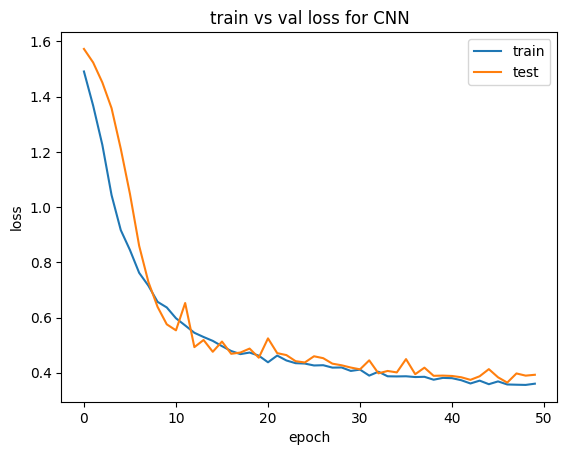

In [39]:
# lets plot the loss (both training and validation) vs epochs
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train vs val loss for CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [40]:
from sklearn.metrics import classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
report = classification_report(y_test_labels, y_pred_labels)
print(report)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       122
           1       0.67      0.90      0.77       110
           2       0.93      0.80      0.86       101
           3       0.81      0.86      0.83       125
           4       0.88      0.73      0.80       115

    accuracy                           0.83       573
   macro avg       0.85      0.83      0.83       573
weighted avg       0.85      0.83      0.84       573



In [41]:
#test sur un audio extistant
audio_path = '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_happy/OAF_bath_happy.wav'
data, sample_rate = librosa.load(audio_path)
mel_feature = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
mfcc_feature = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13).T, axis=0)

# Combiner les deux types de caractéristiques
features = np.hstack((mel_feature, mfcc_feature))

# Mettre à l'échelle les caractéristiques
features_scaled = scaler.transform([features])
prediction = model.predict(features_scaled)
predicted_class = encoder.categories_[0][np.argmax(prediction)]
print(f"Emotion : {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Emotion : happy
